<a href="https://colab.research.google.com/github/Rwalam/ML2023-WesleyFreire/blob/main/at3_fashionMnistKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML2023-1/at3 knn-fashionMnist/fashion-mnist_test.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.duplicated().sum()

1

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

In [8]:
X=df.drop('label',axis=1)
y=df.label

In [9]:
xx=X[0:500]
yy=y[0:500]

In [13]:
normalize=MinMaxScaler()

In [14]:
test_error_rate=[]
train_error_rate=[]
for k in range(1,30):
    # modelo knn
    knn=KNeighborsClassifier(k)
    operations=[('normalize',normalize),('knn',knn)]
    # creating a pipeline
    pipe=Pipeline(steps=operations)
    # performing 5-fold cross validation using the pipeline and df
    cross_dict=cross_validate(pipe,xx,yy,cv=5,scoring='accuracy', return_train_score=True)
    # capturing train and test error rate
    test_error_rate.append(cross_dict['test_score'].mean())
    train_error_rate.append(cross_dict['train_score'].mean())

In [15]:
test_error_rate

[0.73,
 0.716,
 0.7299999999999999,
 0.742,
 0.7300000000000001,
 0.7300000000000001,
 0.728,
 0.732,
 0.73,
 0.72,
 0.704,
 0.712,
 0.7040000000000001,
 0.7060000000000001,
 0.702,
 0.71,
 0.7060000000000001,
 0.6940000000000001,
 0.682,
 0.7020000000000002,
 0.692,
 0.682,
 0.6839999999999999,
 0.692,
 0.674,
 0.668,
 0.674,
 0.6779999999999999,
 0.682]

In [16]:
train_error_rate=[1-acc for acc in train_error_rate]
test_error_rate=[1-acc for acc in test_error_rate]

<Axes: title={'center': 'Graph'}, xlabel='K', ylabel='error_rate'>

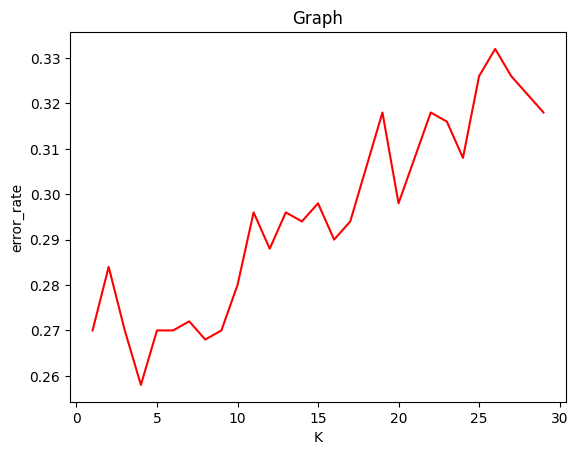

In [29]:
plt.title('Graph')
plt.xlabel('K')
plt.ylabel('error_rate')
sns.lineplot(x=range(1,30),y=test_error_rate, color='red')

In [22]:
knn=KNeighborsClassifier(n_neighbors=4)

In [20]:
X_norm=normalize.fit_transform(xx)

In [ ]:
knn.fit(X_norm,yy)

In [25]:
y_pred=knn.predict(X_norm)
y_pred

array([0, 1, 2, 2, 3, 2, 8, 6, 5, 0, 3, 6, 4, 6, 8, 5, 6, 3, 6, 2, 4, 4,
       2, 1, 7, 7, 8, 2, 4, 1, 7, 7, 7, 8, 1, 0, 9, 8, 0, 3, 2, 0, 6, 6,
       2, 0, 3, 3, 2, 3, 2, 4, 9, 3, 0, 9, 9, 4, 0, 3, 4, 5, 2, 6, 1, 1,
       0, 9, 5, 2, 7, 3, 4, 0, 5, 7, 1, 6, 1, 3, 9, 2, 1, 6, 2, 8, 9, 4,
       1, 6, 3, 4, 6, 6, 2, 0, 4, 7, 7, 3, 9, 3, 9, 0, 8, 2, 3, 2, 2, 7,
       5, 7, 4, 4, 7, 5, 0, 2, 7, 3, 0, 7, 2, 4, 7, 0, 9, 5, 0, 3, 1, 7,
       9, 4, 9, 6, 4, 4, 0, 4, 3, 3, 3, 2, 2, 6, 0, 0, 1, 3, 4, 3, 3, 1,
       9, 3, 3, 3, 9, 5, 6, 7, 7, 3, 2, 2, 0, 2, 7, 2, 6, 8, 9, 0, 2, 4,
       6, 8, 7, 9, 7, 1, 3, 9, 1, 7, 5, 6, 0, 7, 4, 9, 1, 6, 0, 0, 6, 6,
       2, 9, 0, 4, 6, 5, 5, 8, 6, 2, 1, 9, 0, 0, 7, 1, 7, 5, 9, 0, 2, 8,
       7, 7, 9, 3, 2, 4, 5, 9, 8, 1, 9, 7, 0, 2, 9, 7, 4, 0, 9, 2, 1, 5,
       7, 7, 0, 2, 4, 5, 3, 3, 8, 1, 0, 2, 4, 8, 4, 9, 8, 3, 3, 6, 4, 2,
       2, 9, 3, 9, 2, 8, 6, 6, 8, 2, 7, 2, 5, 5, 9, 7, 7, 2, 4, 8, 4, 8,
       3, 1, 4, 4, 2, 1, 8, 1, 3, 0, 3, 1, 7, 0, 7,

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
train_accuracy=round(100*accuracy_score(yy,y_pred),2)
print(f'The train accuracy score is {train_accuracy}%')

The train accuracy score is 82.6%
